<a href="https://colab.research.google.com/github/MohanadKh03/Income-Prediction/blob/main/Income_Prediction_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1728]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Accuracy measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [1729]:
data = pd.read_csv("/content/train_data.csv")

lbl = LabelEncoder()

In [1730]:
#count =(data['capital-gain']==0).sum()
#print(count)
#data.isin([" ?"]).sum()
#count =(data['capital-loss']==0).sum()
#print(count)

education_count = data.groupby('education-num').size().reset_index(name='count')

print(education_count)


    education-num  count
0               1     51
1               2    168
2               3    333
3               4    646
4               5    514
5               6    933
6               7   1175
7               8    433
8               9  10501
9              10   7291
10             11   1382
11             12   1067
12             13   5355
13             14   1723
14             15    576
15             16    413


In [1731]:
#  q1  q2  q3
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1732]:
data=data.replace(' ?' , np.NaN) #convert any question mark to null
# solve problem of feature selesction

data.drop('fnlwgt',axis=1 ,inplace=True)
data.drop('capital-gain',axis=1 ,inplace=True)
data.drop('capital-loss',axis=1 ,inplace=True)
data.drop('relationship',axis=1 ,inplace=True)


In [1733]:
#solve problem of nulls

data['workclass'].fillna(data['workclass'].mode()[0],inplace=True) # tets sucseesded
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True) # test sucseeded
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True) # test sucseeded


In [1734]:
#solve problem of outliers

# education num column
edu_q1=9
edu_q3=12
edu_IQR=edu_q3-edu_q1
minconvert=math.ceil(edu_q1-1.5*edu_IQR)
maxconvert=math.floor(edu_q3+1.5*edu_IQR)
data.loc[data['education-num']<minconvert,'education-num']=minconvert
data.loc[data['education-num']>maxconvert,'education-num']=maxconvert

#hours per week 
hours_q1=40
hours_q3=45
hours_IQR=hours_q3-hours_q1
minconvert2=math.ceil(hours_q1-1.5*hours_IQR)
maxconvert2=math.floor(hours_q3+1.5*hours_IQR)
data.loc[data['hours-per-week']<minconvert2,'hours-per-week']=minconvert2
data.loc[data['hours-per-week']>maxconvert2,'hours-per-week']=maxconvert2


In [1735]:

print(minconvert2)
print(maxconvert2)


33
52


In [1736]:

education_count = data.groupby('hours-per-week').size().reset_index(name='count')

print(education_count)


    hours-per-week  count
0               33   5555
1               34     28
2               35   1297
3               36    220
4               37    149
5               38    476
6               39     38
7               40  15217
8               41     36
9               42    219
10              43    151
11              44    212
12              45   1824
13              46     82
14              47     49
15              48    517
16              49     29
17              50   2819
18              51     13
19              52   3630


In [1737]:
x_train = data.drop(['Income '],axis=1)
y_train = data['Income ']

In [1738]:
def Feature_Encoder(X,cols):
    for c in cols:
        X[c] = lbl.fit_transform(X[c])
    return X

In [1739]:
cols = ("workclass","education","marital-status","occupation","race","sex","native-country")
x_train = Feature_Encoder(x_train,cols)
y_train = lbl.fit_transform(y_train)

In [1740]:
test = pd.read_csv('/content/test_data.csv')
test=test.replace(' ?' , np.NaN)

#solve problem of featur selection
test.drop('fnlwgt',axis=1 ,inplace=True)
test.drop('capital-gain',axis=1 ,inplace=True)
test.drop('capital-loss',axis=1 ,inplace=True)
test.drop('relationship',axis=1 ,inplace=True)


In [1741]:
test.isnull().sum()

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
race                0
sex                 0
hours-per-week      0
native-country    274
Income              0
dtype: int64

In [1742]:
#solve problem of nulls

test['workclass'].fillna(data['workclass'].mode()[0],inplace=True) # tets sucseesded
test['occupation'].fillna(data['occupation'].mode()[0],inplace=True) # test sucseeded
test['native-country'].fillna(data['native-country'].mode()[0],inplace=True) # test sucseeded


In [1743]:
#solve problem of outliers

# education num column
edu_q1=9
edu_q3=12
edu_IQR=edu_q3-edu_q1
minconvert=math.ceil(edu_q1-1.5*edu_IQR)
maxconvert=math.floor(edu_q3+1.5*edu_IQR)
test.loc[test['education-num']<minconvert,'education-num']=minconvert
test.loc[test['education-num']>maxconvert,'education-num']=maxconvert

#hours per week 
hours_q1=40
hours_q3=45
hours_IQR=hours_q3-hours_q1
minconvert2=math.ceil(hours_q1-1.5*hours_IQR)
maxconvert2=math.floor(hours_q3+1.5*hours_IQR)
test.loc[test['hours-per-week']<minconvert2,'hours-per-week']=minconvert2
test.loc[test['hours-per-week']>maxconvert2,'hours-per-week']=maxconvert2


In [1744]:
x_test = test.drop(['Income '], axis=1)
y_test = test['Income ']

In [1745]:
x_test = Feature_Encoder(x_test,cols)
y_test = lbl.fit_transform(y_test)

In [1746]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [1747]:
#Logistic Regression
classifier = LogisticRegression(random_state = 44)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [1748]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [1749]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

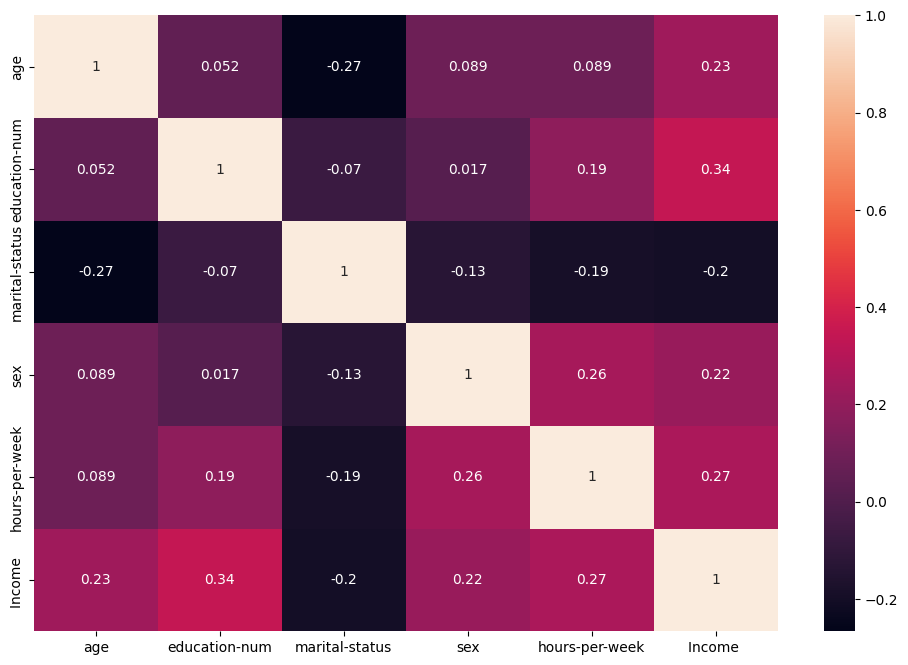

In [1750]:
corr_data = data.iloc[:,:]

# Encode string columns to numerical values
for col in corr_data.columns:
    if corr_data[col].dtype == 'object':
        corr_data[col] = lbl.fit_transform(corr_data[col])

corr = corr_data.corr()

#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Income ']) > 0.1]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = corr_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [1751]:
print("Accuracy  : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test,y_pred))
print("Recall : ", recall_score(y_test,y_pred))
print("F1-Score : ", f1_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Accuracy  :  0.8016092377618083
Precision :  0.6307300509337861
Recall :  0.38637545501820075
F1-Score :  0.47920025798129634
Confusion Matrix : 
 [[11565   870]
 [ 2360  1486]]


In [1752]:
#Decision Tree
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [1753]:
print("Accuracy  : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test,y_pred))
print("Recall : ", recall_score(y_test,y_pred))
print("F1-Score : ", f1_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Accuracy  :  0.7855782814323444
Precision :  0.5476766048885308
Recall :  0.5301612064482579
F1-Score :  0.5387765887171357
Confusion Matrix : 
 [[10751  1684]
 [ 1807  2039]]


In [1754]:
#SVM Tree
classifier = SVC(C=1.0, random_state=1, kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [1755]:
print("Accuracy  : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test,y_pred))
print("Recall : ", recall_score(y_test,y_pred))
print("F1-Score : ", f1_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Accuracy  :  0.8041275105951723
Precision :  0.6537201684604586
Recall :  0.36323452938117523
F1-Score :  0.46698980444593013
Confusion Matrix : 
 [[11695   740]
 [ 2449  1397]]
